In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#!pip install matplotlib seaborn
import warnings
warnings.simplefilter('ignore')

In [3]:
df= pd.read_csv('train.csv')
df.head()

,Unnamed: 0,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,25629,INN25630,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,14473,INN14474,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,23720,INN23721,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,5843,INN05844,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,18709,INN18710,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [4]:
df.columns

Index(['Unnamed: 0', 'Booking_ID', 'no_of_adults', 'no_of_children',
       'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan',
       'required_car_parking_space', 'room_type_reserved', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'market_segment_type',
       'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests', 'booking_status'],
      dtype='object')

In [5]:
df.drop(columns=['Unnamed: 0','Booking_ID'], inplace=True)

In [6]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [7]:
df.shape

(29020, 18)

In [8]:
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(7661)

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.shape

(21359, 18)

In [13]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [14]:
df['no_of_adults'].value_counts()

no_of_adults
2    15489
1     3996
3     1748
0      113
4       13
Name: count, dtype: int64

In [15]:
df["no_of_children"].value_counts()

no_of_children
0     19251
1      1257
2       837
3        11
9         2
10        1
Name: count, dtype: int64

In [16]:
df["booking_status"].value_counts()

booking_status
Not_Canceled    15231
Canceled         6128
Name: count, dtype: int64

In [17]:
cat_cols = ['type_of_meal_plan', 'required_car_parking_space',
            'room_type_reserved', 'market_segment_type', 'repeated_guest','booking_status']

num_cols = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
            'no_of_week_nights', 'lead_time', 'arrival_year', 'arrival_month',
            'arrival_date', 'no_of_weekend_nights', 'no_of_week_nights',
            'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
            'avg_price_per_room', 'no_of_special_requests']

### DATA ANALYSIS

In [18]:
data = df.copy()

In [19]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


##### UNIVARIATE ANALYSIS   

In [20]:
def num_plot_dist(df,num_cols):
    fig, axes = plt.subplots(len(num_cols), 2, figsize=(15, 5 * len(num_cols)))
    if len(num_cols) == 1:
        axes = [axes] 
        
    for i, col in enumerate(num_cols):
        sns.histplot(data=df, x=col,  ax=axes[i][0], kde=True, palette='viridis')
        axes[i][0].set_title(f'Histogram for {col}')
        
        sns.boxplot(data=df, x=col, ax=axes[i][1], palette='Blues')
        axes[i][1].set_title(f'Boxplot for {col}')
        
    plt.tight_layout()
    plt.show()

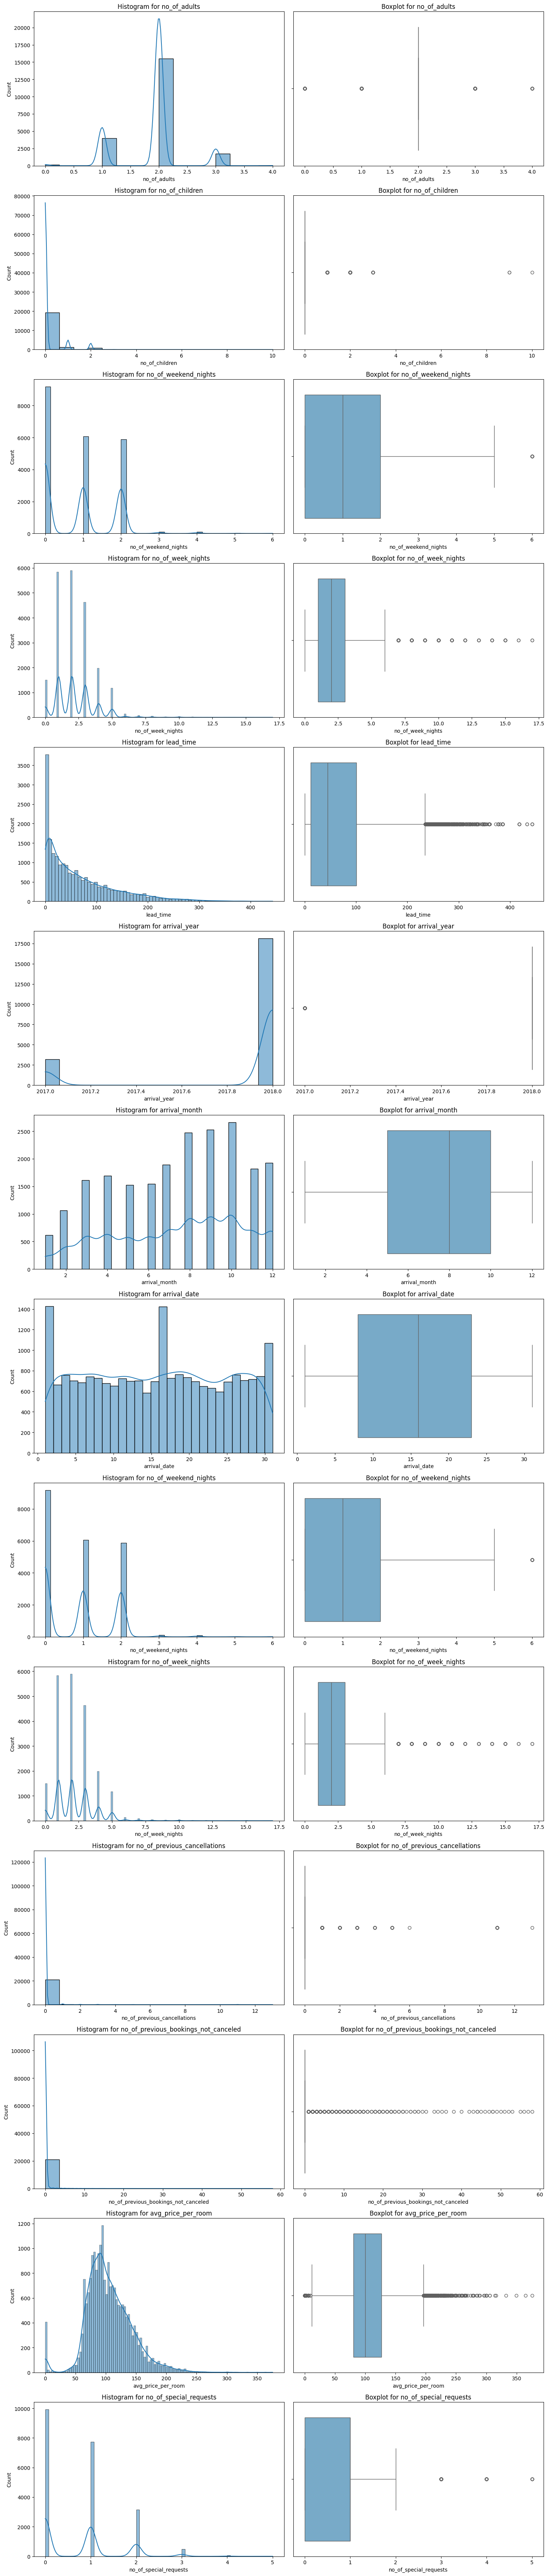

In [21]:
num_plot_dist(data, num_cols)

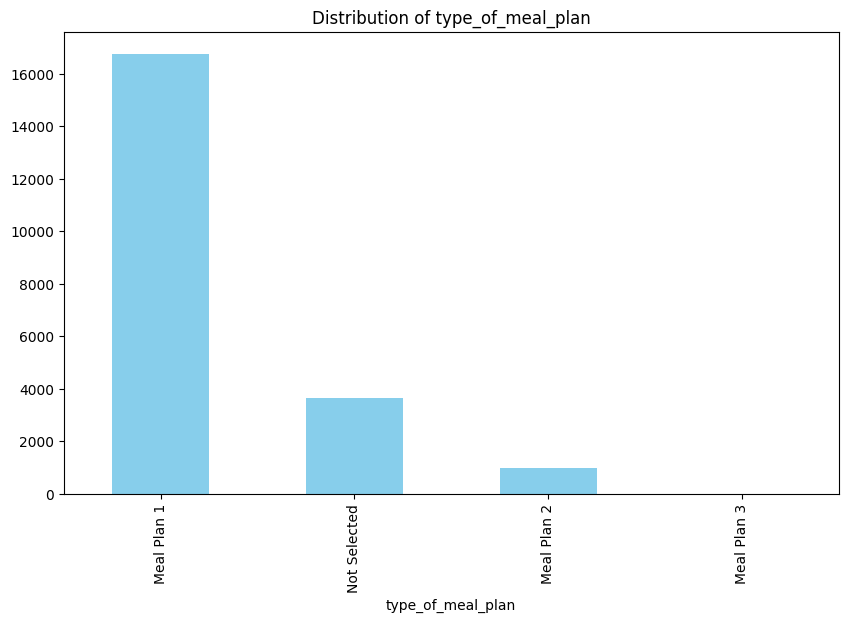

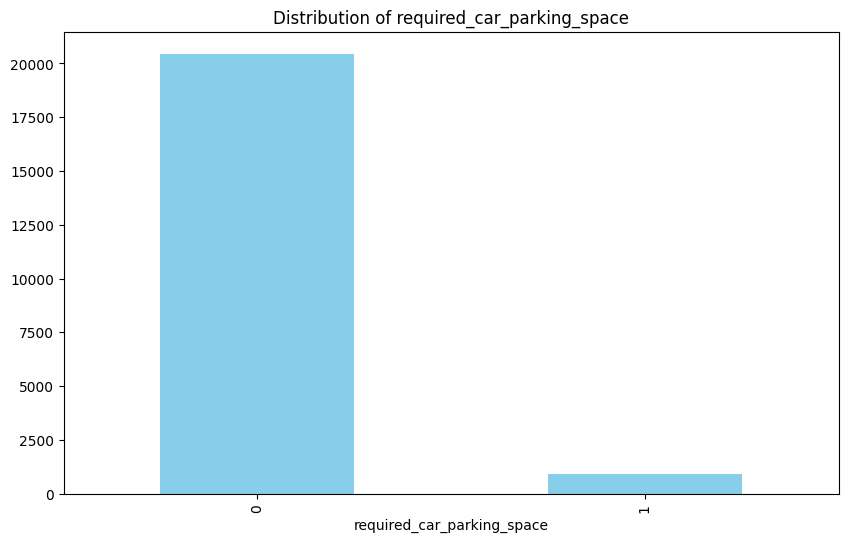

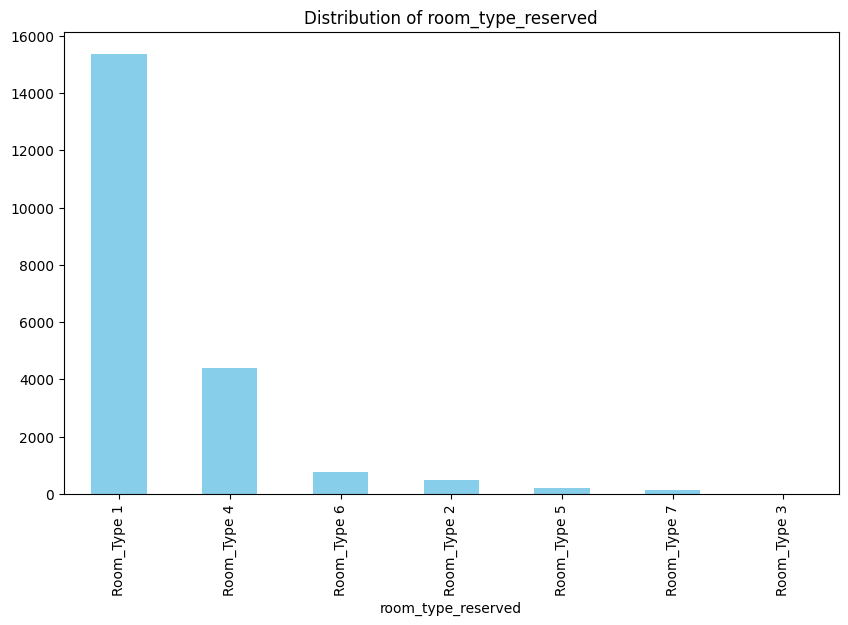

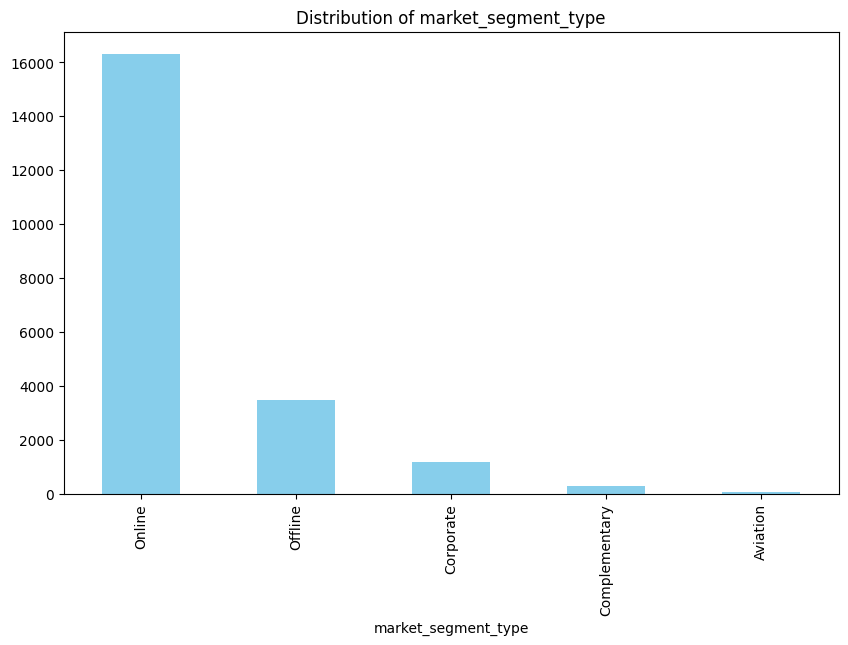

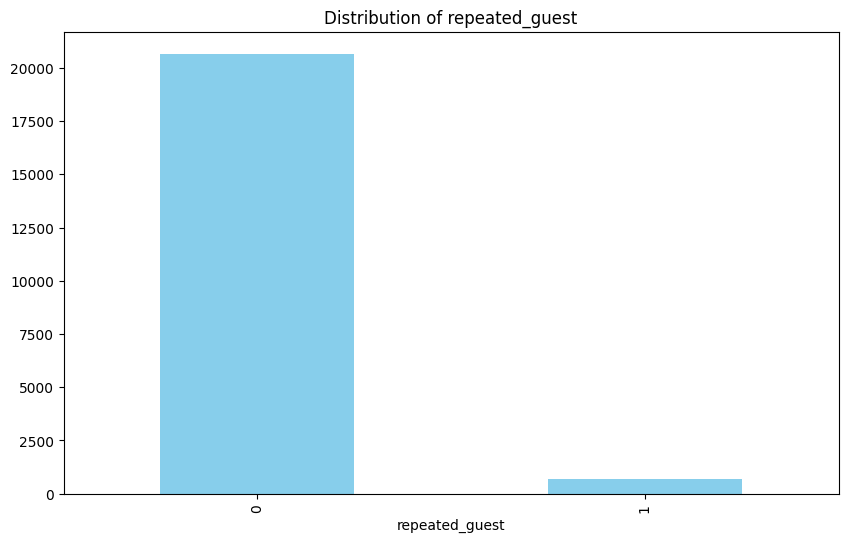

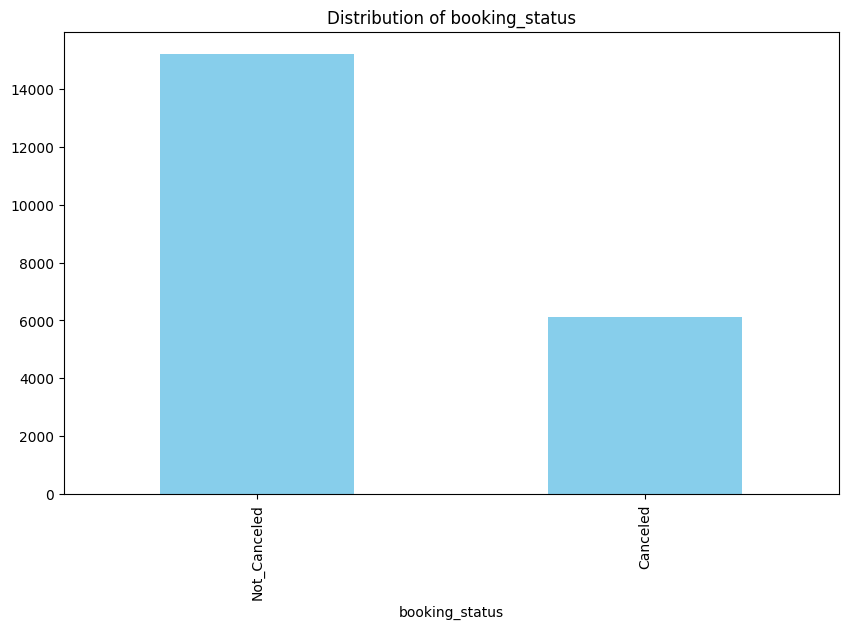

In [22]:
for cat_feature in cat_cols:
    plt.figure(figsize=(10, 6))
    data[cat_feature].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Distribution of {cat_feature}')
    plt.xlabel(cat_feature)

##### Bivariate Analysis

In [23]:
def plot_bivariate_num(df, target, num_features):
    num_plots = len(num_features)
    num_rows = (num_plots + 1) // 2
    
    fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5 * num_rows))
    axes = axes.flatten() if num_rows > 1 else [axes]
    for i, column in enumerate(num_features):
        sns.boxplot(x=target, y=column, data=df, ax=axes[i], palette='viridis')
        axes[i].set_title(f'{target} vs {column}')
        
    plt.tight_layout()
    plt.show()

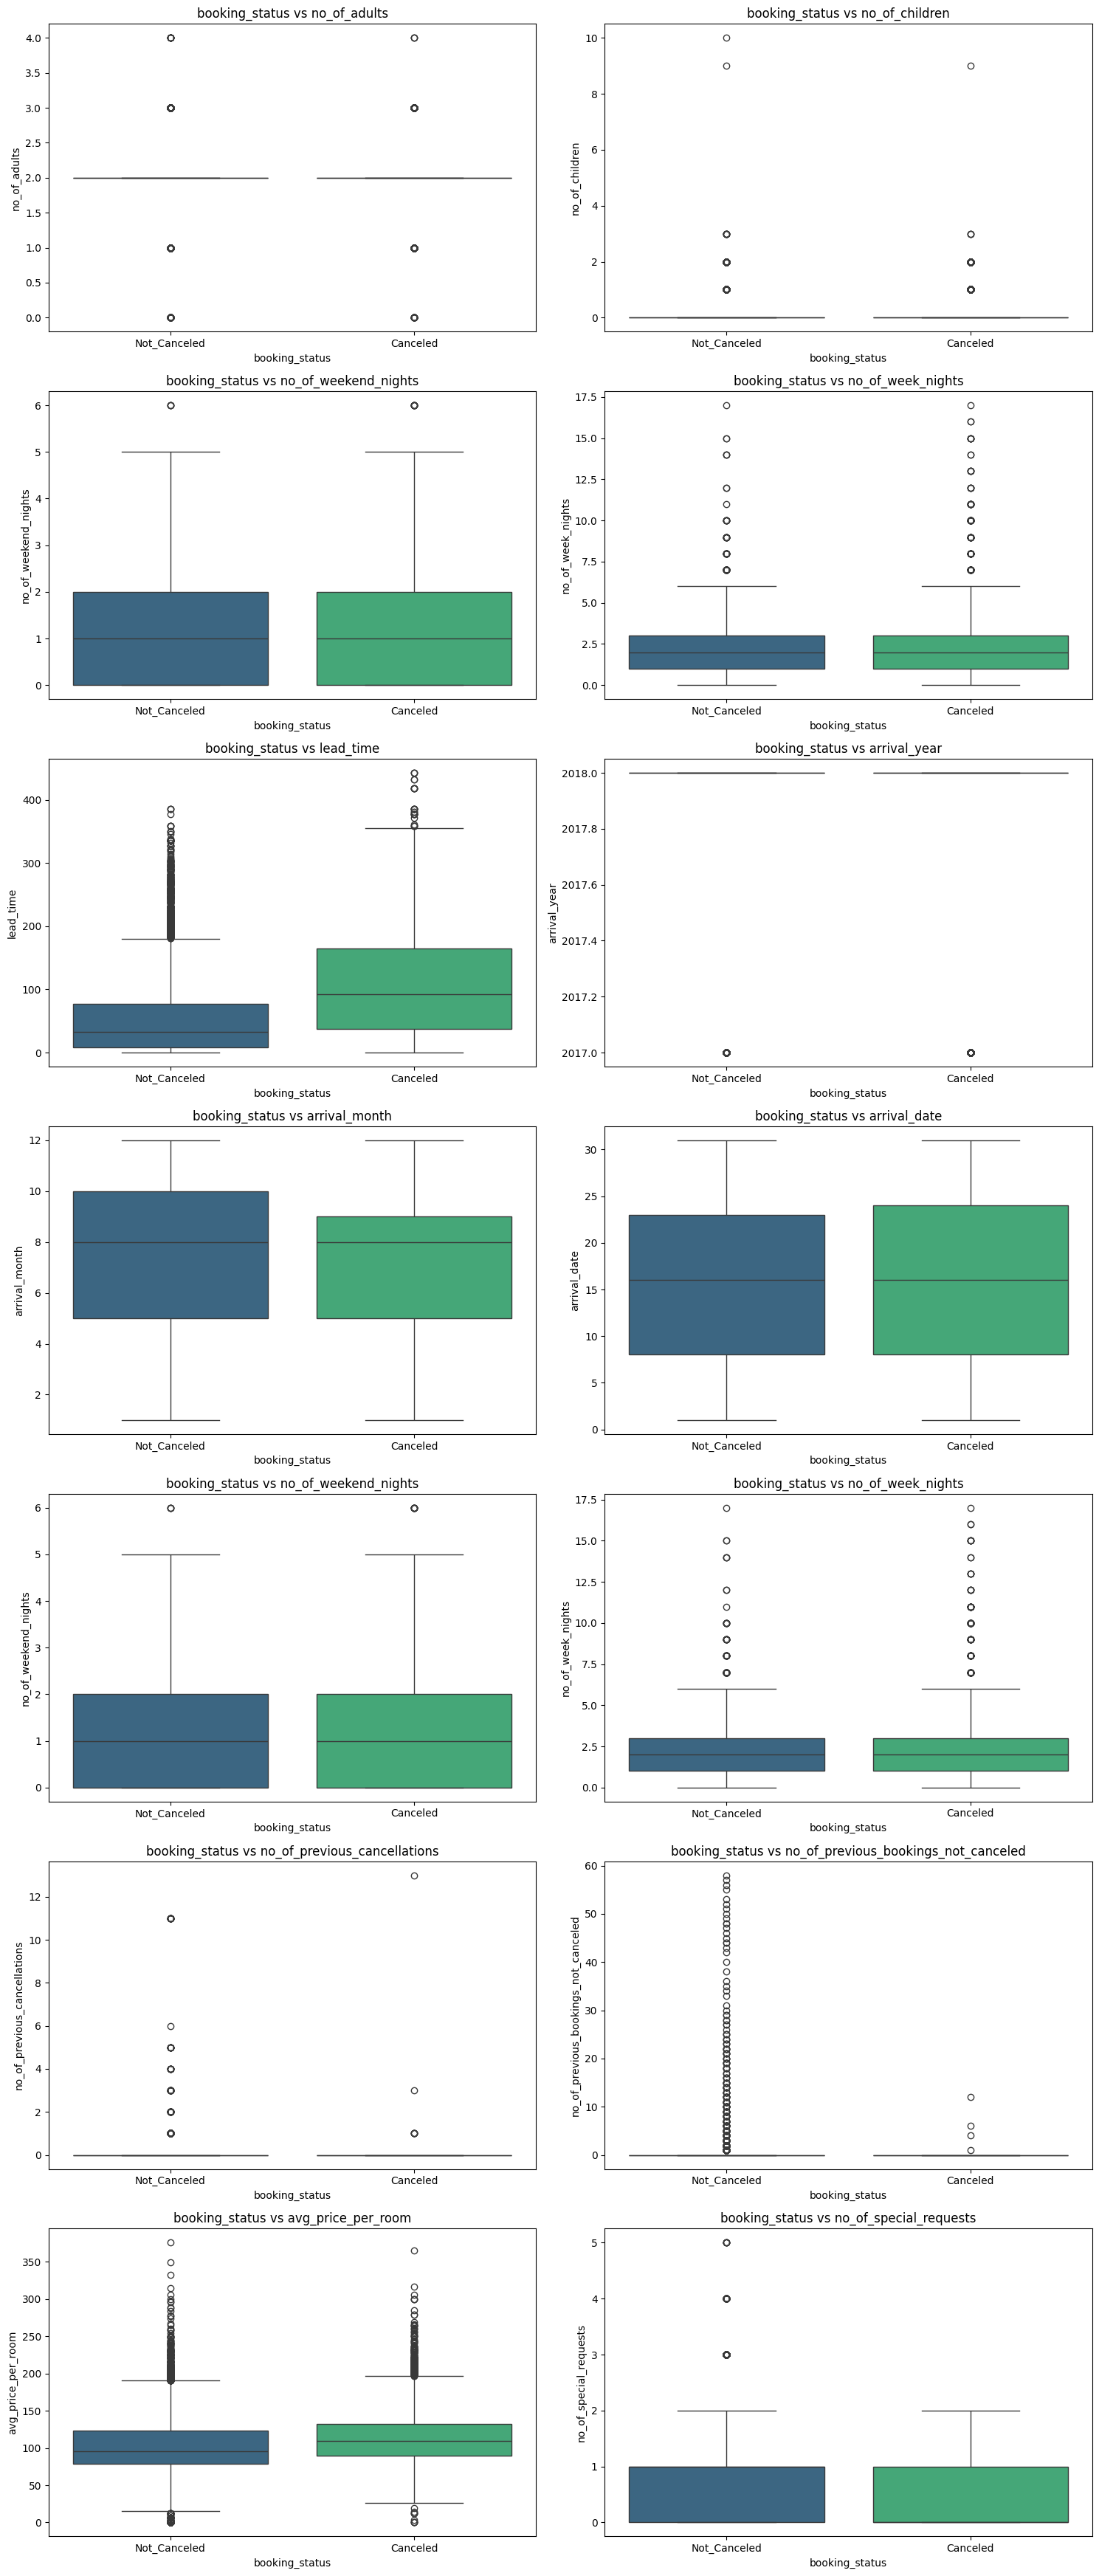

In [24]:
plot_bivariate_num(data, 'booking_status', num_cols)

Text(0.5, 1.0, 'Average Price per Room by Arrival Month')

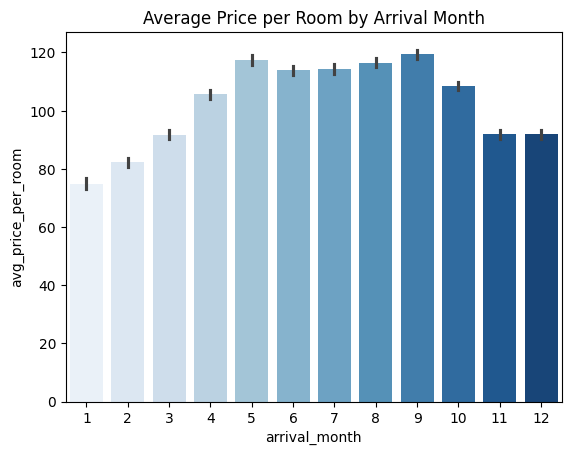

In [25]:
sns.barplot(x='arrival_month', y='avg_price_per_room', data=data, palette='Blues')
plt.title('Average Price per Room by Arrival Month')

In [26]:
def plot_bivariate_cat(df, target, cat_features):
    num_plots = len(cat_features)
    num_rows = (num_plots + 1) // 2

    fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5 * num_rows))
    axes = axes.flatten() if num_rows > 1 else [axes]
    for i, feature in enumerate(cat_features):
        sns.countplot(x=feature, hue=target, data=df, ax=axes[i], palette='Set2')
        axes[i].set_title(f'{target} vs {feature}')
        axes[i].tick_params(axis='x', rotation=90)

    plt.tight_layout()
    plt.show()

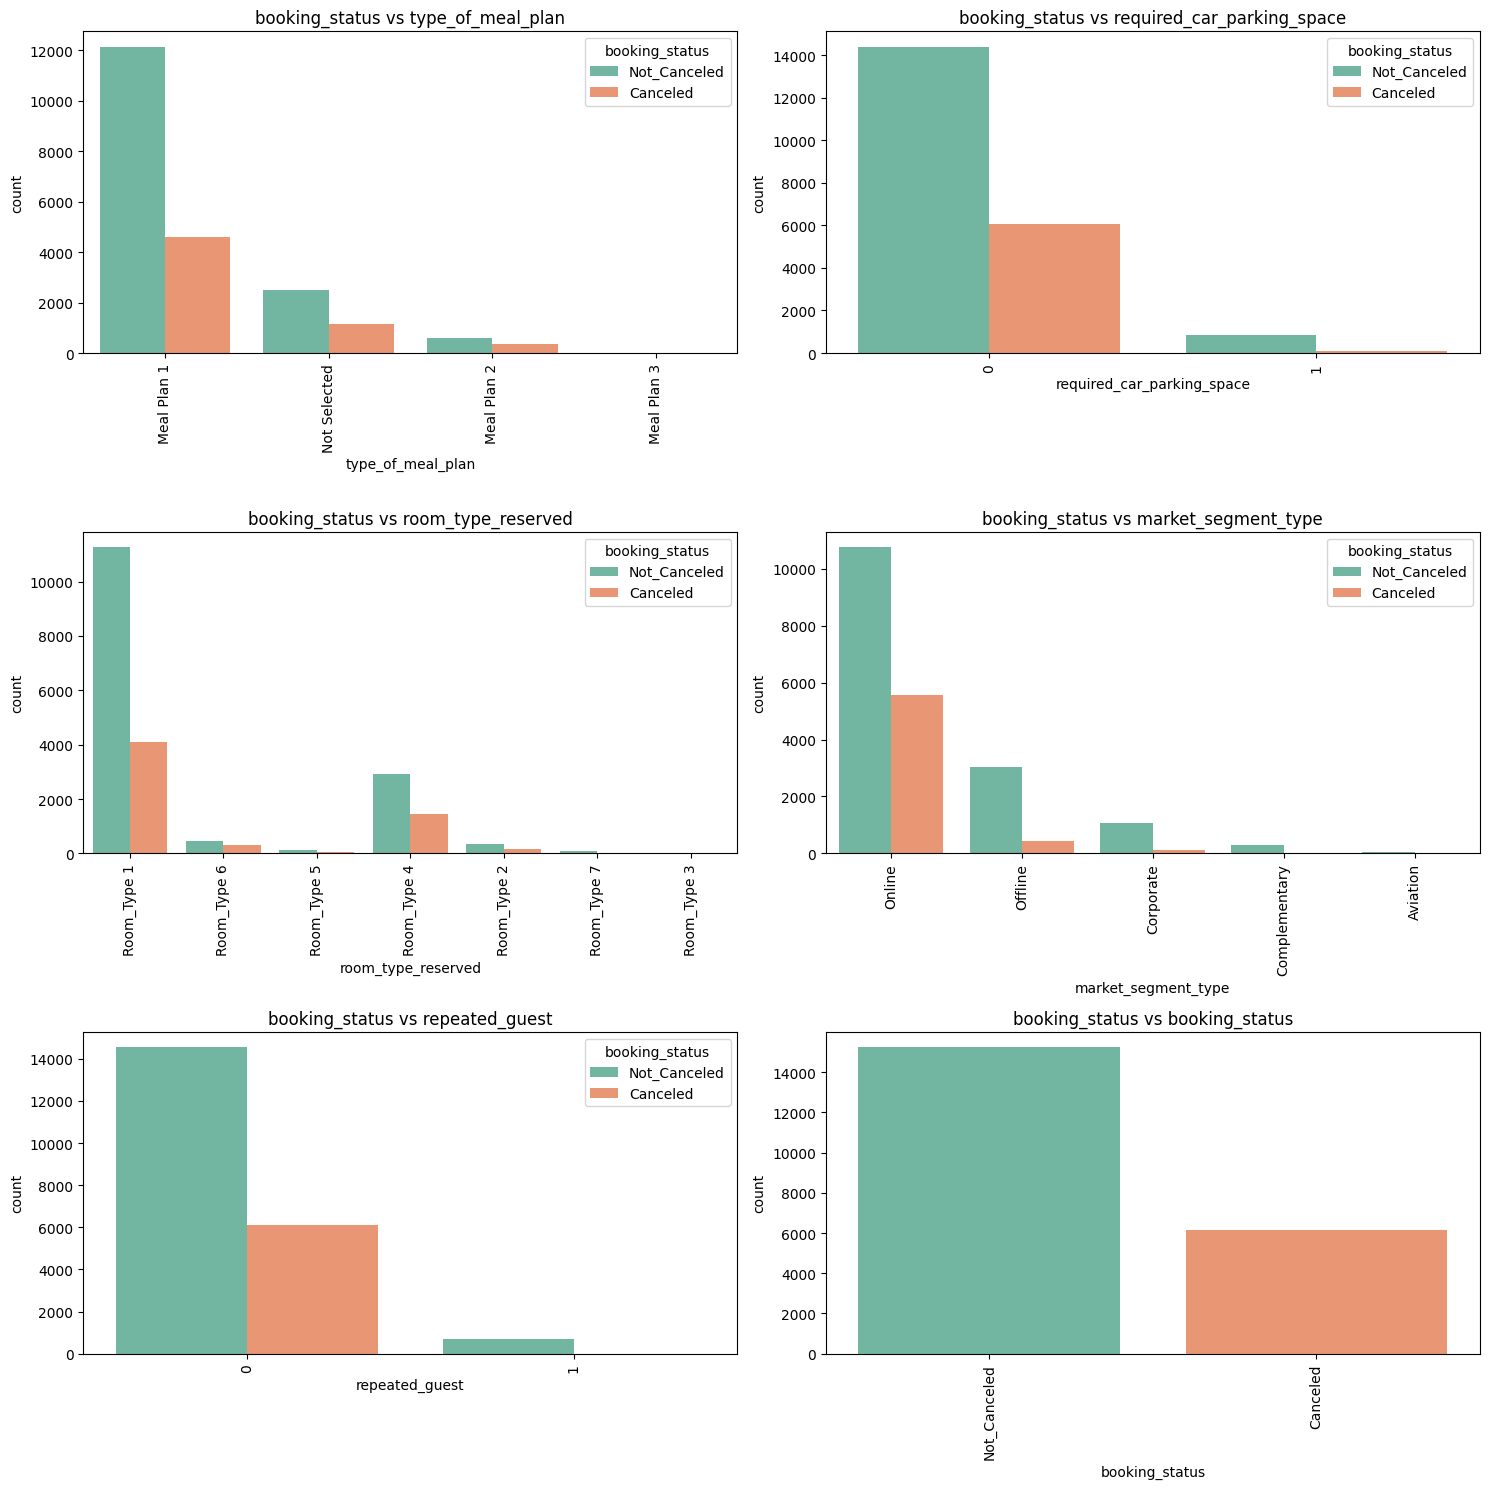

In [27]:
plot_bivariate_cat(data, 'booking_status', cat_cols)

### DATA PROCESSING

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21359 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21359 non-null  int64  
 1   no_of_children                        21359 non-null  int64  
 2   no_of_weekend_nights                  21359 non-null  int64  
 3   no_of_week_nights                     21359 non-null  int64  
 4   type_of_meal_plan                     21359 non-null  object 
 5   required_car_parking_space            21359 non-null  int64  
 6   room_type_reserved                    21359 non-null  object 
 7   lead_time                             21359 non-null  int64  
 8   arrival_year                          21359 non-null  int64  
 9   arrival_month                         21359 non-null  int64  
 10  arrival_date                          21359 non-null  int64  
 11  market_segment_type 

##### Label Encoding

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
label_encoders = LabelEncoder()

mapppings = {}

for col in cat_cols:
    df[col] = label_encoders.fit_transform(df[col])
    mapppings[col] = dict(zip(label_encoders.classes_, label_encoders.transform(label_encoders.classes_)))

In [31]:
mapppings

{'type_of_meal_plan': {'Meal Plan 1': np.int64(0),
  'Meal Plan 2': np.int64(1),
  'Meal Plan 3': np.int64(2),
  'Not Selected': np.int64(3)},
 'required_car_parking_space': {np.int64(0): np.int64(0),
  np.int64(1): np.int64(1)},
 'room_type_reserved': {'Room_Type 1': np.int64(0),
  'Room_Type 2': np.int64(1),
  'Room_Type 3': np.int64(2),
  'Room_Type 4': np.int64(3),
  'Room_Type 5': np.int64(4),
  'Room_Type 6': np.int64(5),
  'Room_Type 7': np.int64(6)},
 'market_segment_type': {'Aviation': np.int64(0),
  'Complementary': np.int64(1),
  'Corporate': np.int64(2),
  'Offline': np.int64(3),
  'Online': np.int64(4)},
 'repeated_guest': {np.int64(0): np.int64(0), np.int64(1): np.int64(1)},
 'booking_status': {'Canceled': np.int64(0), 'Not_Canceled': np.int64(1)}}

In [32]:
for label,code in mapppings.items():
    print(f"{label}: {code}")

type_of_meal_plan: {'Meal Plan 1': np.int64(0), 'Meal Plan 2': np.int64(1), 'Meal Plan 3': np.int64(2), 'Not Selected': np.int64(3)}
required_car_parking_space: {np.int64(0): np.int64(0), np.int64(1): np.int64(1)}
room_type_reserved: {'Room_Type 1': np.int64(0), 'Room_Type 2': np.int64(1), 'Room_Type 3': np.int64(2), 'Room_Type 4': np.int64(3), 'Room_Type 5': np.int64(4), 'Room_Type 6': np.int64(5), 'Room_Type 7': np.int64(6)}
market_segment_type: {'Aviation': np.int64(0), 'Complementary': np.int64(1), 'Corporate': np.int64(2), 'Offline': np.int64(3), 'Online': np.int64(4)}
repeated_guest: {np.int64(0): np.int64(0), np.int64(1): np.int64(1)}
booking_status: {'Canceled': np.int64(0), 'Not_Canceled': np.int64(1)}


In [33]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,0,0,0,26,2017,10,17,4,0,0,0,161.00,0,1
1,2,1,1,1,0,0,0,98,2018,7,16,4,0,0,0,121.50,2,1
2,2,0,0,3,0,0,0,433,2018,9,8,3,0,0,0,70.00,0,0
3,2,0,2,5,0,0,0,195,2018,8,8,3,0,0,0,72.25,0,1
4,1,0,0,2,0,0,0,188,2018,6,15,3,0,0,0,130.00,0,0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21359 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21359 non-null  int64  
 1   no_of_children                        21359 non-null  int64  
 2   no_of_weekend_nights                  21359 non-null  int64  
 3   no_of_week_nights                     21359 non-null  int64  
 4   type_of_meal_plan                     21359 non-null  int64  
 5   required_car_parking_space            21359 non-null  int64  
 6   room_type_reserved                    21359 non-null  int64  
 7   lead_time                             21359 non-null  int64  
 8   arrival_year                          21359 non-null  int64  
 9   arrival_month                         21359 non-null  int64  
 10  arrival_date                          21359 non-null  int64  
 11  market_segment_type 

### Multicollinearity

In [35]:
!pip install statsmodels

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant    

In [37]:
X = add_constant(df)

vif_data = pd.DataFrame()

vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [38]:
vif_data

,feature,VIF
0,const,4.100197e+07
1,no_of_adults,1.341180e+00
2,no_of_children,1.282459e+00
3,no_of_weekend_nights,1.073215e+00
4,no_of_week_nights,1.125260e+00
5,type_of_meal_plan,1.178228e+00
6,required_car_parking_space,1.036105e+00
7,room_type_reserved,1.549859e+00
8,lead_time,1.406287e+00
9,arrival_year,1.288533e+00


####

#### Our Data does dot have multicollinearity

In [39]:
corr = df.corr()

In [40]:
corr

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
no_of_adults,1.000000,-0.049738,0.092764,0.114218,-0.005977,0.000419,0.275089,0.150995,0.096366,0.004833,0.018382,0.310783,-0.238974,-0.063739,-0.143903,0.327749,0.156833,-0.097198
no_of_children,-0.049738,1.000000,0.011033,0.019408,-0.102631,0.018089,0.351786,0.010094,0.036248,0.002606,0.027934,0.103359,-0.048678,-0.020954,-0.029112,0.352640,0.099069,-0.060030
no_of_weekend_nights,0.092764,0.011033,1.000000,0.223154,-0.041123,-0.057417,0.029964,0.131240,0.029016,0.011300,0.006921,0.091510,-0.088633,-0.028935,-0.040008,-0.003579,0.013803,-0.067944
no_of_week_nights,0.114218,0.019408,0.223154,1.000000,-0.073247,-0.061798,0.085547,0.223953,0.022199,0.030029,-0.000633,0.116978,-0.115186,-0.033133,-0.051829,0.018420,0.032304,-0.124415
type_of_meal_plan,-0.005977,-0.102631,-0.041123,-0.073247,1.000000,-0.024666,-0.245616,-0.055124,0.094627,0.008576,-0.006094,0.184654,-0.075476,-0.017205,-0.044891,-0.100708,-0.011933,-0.035864
required_car_parking_space,0.000419,0.018089,-0.057417,-0.061798,-0.024666,1.000000,0.016335,-0.046767,0.010158,-0.015330,-0.009352,-0.039210,0.113582,0.026876,0.066665,0.055536,0.075479,0.092511
room_type_reserved,0.275089,0.351786,0.029964,0.085547,-0.245616,0.016335,1.000000,-0.014666,0.090492,0.001906,0.024315,0.089176,-0.045353,-0.013842,-0.024727,0.490983,0.086319,-0.072128
lead_time,0.150995,0.010094,0.131240,0.223953,-0.055124,-0.046767,-0.014666,1.000000,0.169463,0.132140,0.034112,0.140396,-0.148948,-0.053930,-0.087026,-0.044061,-0.012787,-0.368151
arrival_year,0.096366,0.036248,0.029016,0.022199,0.094627,0.010158,0.090492,0.169463,1.000000,-0.322786,0.011340,0.111445,-0.010158,0.011111,0.025551,0.174569,0.000594,-0.149673
arrival_month,0.004833,0.002606,0.011300,0.030029,0.008576,-0.015330,0.001906,0.132140,-0.322786,1.000000,-0.020386,-0.017885,0.001744,-0.043586,-0.003881,0.066156,0.136037,0.015898


<Axes: >

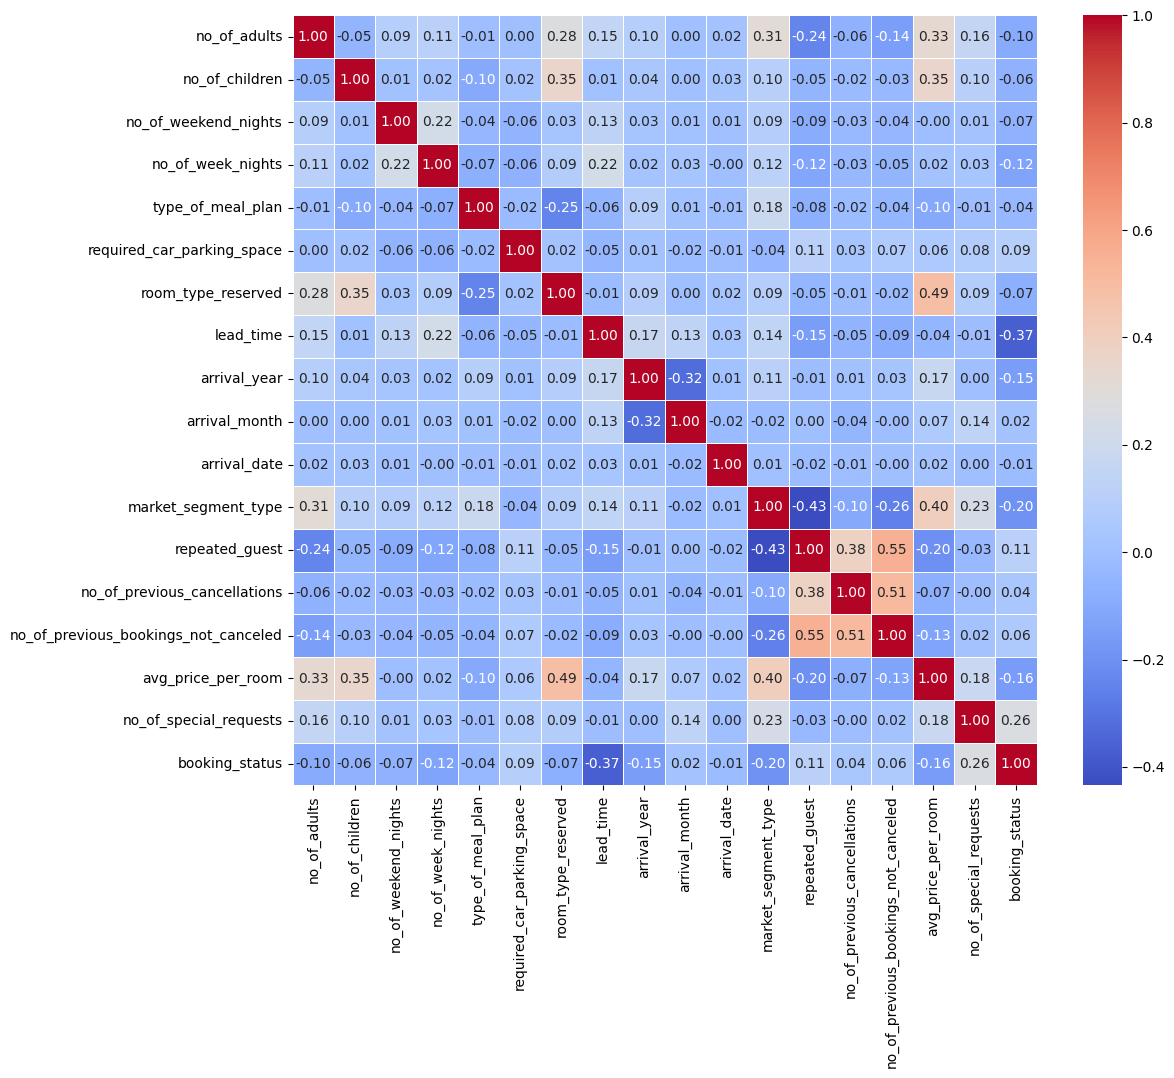

In [41]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

#### Skewness

In [42]:
skewness = df.skew()

In [43]:
skewness

no_of_adults                            -0.305652
no_of_children                           4.165696
no_of_weekend_nights                     0.636637
no_of_week_nights                        1.553657
type_of_meal_plan                        1.650716
required_car_parking_space               4.538315
room_type_reserved                       1.392145
lead_time                                1.405258
arrival_year                            -1.953273
arrival_month                           -0.293266
arrival_date                             0.010333
market_segment_type                     -2.333046
repeated_guest                           5.282330
no_of_previous_cancellations            22.001489
no_of_previous_bookings_not_canceled    16.735934
avg_price_per_room                       0.542888
no_of_special_requests                   0.922373
booking_status                          -0.942305
dtype: float64

In [44]:
for col in df.columns:
    if abs(skewness[col]) > 5:
        df[col] = np.log1p(df[col])
        print(f"Applied log transformation to {col}")

Applied log transformation to repeated_guest
Applied log transformation to no_of_previous_cancellations
Applied log transformation to no_of_previous_bookings_not_canceled


In [45]:
skewness = df.skew()


In [46]:
skewness

no_of_adults                            -0.305652
no_of_children                           4.165696
no_of_weekend_nights                     0.636637
no_of_week_nights                        1.553657
type_of_meal_plan                        1.650716
required_car_parking_space               4.538315
room_type_reserved                       1.392145
lead_time                                1.405258
arrival_year                            -1.953273
arrival_month                           -0.293266
arrival_date                             0.010333
market_segment_type                     -2.333046
repeated_guest                           5.282330
no_of_previous_cancellations            13.270580
no_of_previous_bookings_not_canceled     7.619850
avg_price_per_room                       0.542888
no_of_special_requests                   0.922373
booking_status                          -0.942305
dtype: float64

#### Imbalanced Data

In [47]:
df.booking_status.value_counts()

booking_status
1    15231
0     6128
Name: count, dtype: int64

In [48]:
X = df.drop(columns=['booking_status'])
y = df['booking_status']

In [49]:
!pip install imbalanced-learn

In [50]:
y.value_counts()

booking_status
1    15231
0     6128
Name: count, dtype: int64

In [51]:
from imblearn.over_sampling import SMOTE

In [52]:
smote = SMOTE(random_state=42)

X_resampled, y_resampled = smote.fit_resample(X, y)

In [53]:
y_resampled.value_counts()

booking_status
1    15231
0    15231
Name: count, dtype: int64

In [54]:
balanced_df = pd.DataFrame(X_resampled, columns=X.columns)
balanced_df['booking_status'] = y_resampled

In [55]:
balanced_df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,0,0,0,26,2017,10,17,4,0.0,0.0,0.0,161.00,0,1
1,2,1,1,1,0,0,0,98,2018,7,16,4,0.0,0.0,0.0,121.50,2,1
2,2,0,0,3,0,0,0,433,2018,9,8,3,0.0,0.0,0.0,70.00,0,0
3,2,0,2,5,0,0,0,195,2018,8,8,3,0.0,0.0,0.0,72.25,0,1
4,1,0,0,2,0,0,0,188,2018,6,15,3,0.0,0.0,0.0,130.00,0,0


In [56]:
balanced_df.shape

(30462, 18)

In [57]:
df = balanced_df.copy()

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
X= df.drop(columns=['booking_status'])
y = df['booking_status']    

In [60]:
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

RandomForestClassifier(random_state=42)

In [61]:
feature_importance = model.feature_importances_

In [62]:
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

In [63]:
feature_importance_df

,Feature,Importance
7,lead_time,0.260226
16,no_of_special_requests,0.183688
15,avg_price_per_room,0.150109
9,arrival_month,0.085296
10,arrival_date,0.084464
11,market_segment_type,0.057997
3,no_of_week_nights,0.044419
2,no_of_weekend_nights,0.030316
4,type_of_meal_plan,0.020648
6,room_type_reserved,0.020059


In [64]:
len(df.columns)

18

In [65]:
top_10_features = feature_importance_df['Feature'].head(10).values
top_10_df = df[top_10_features.tolist() + ['booking_status']]

In [66]:
top_10_df

,lead_time,no_of_special_requests,avg_price_per_room,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,type_of_meal_plan,room_type_reserved,booking_status
0,26,0,161.000000,10,17,4,1,2,0,0,1
1,98,2,121.500000,7,16,4,1,1,0,0,1
2,433,0,70.000000,9,8,3,3,0,0,0,0
3,195,0,72.250000,8,8,3,5,2,0,0,1
4,188,0,130.000000,6,15,3,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
30457,265,0,111.037207,6,24,3,2,0,1,0,0
30458,103,0,72.250000,4,18,3,3,1,0,0,0
30459,27,0,104.556265,6,12,4,2,1,1,0,0
30460,46,0,107.100000,4,4,4,1,1,3,0,0


In [67]:
len(top_10_df.columns)

11

In [68]:
df = top_10_df.copy()

### MODEL SELECTION

In [69]:
!pip install xgboost lightgbm

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [71]:
X = df.drop(columns=['booking_status'])
y = df['booking_status']

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
classifiers = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(random_state=42),
    'LightGBM': LGBMClassifier(random_state=42)
}

In [74]:
metrics = {
    'Model': [],
    'Accuracy': [],
    'Recall': [],
    'Precision': [],
    'F1 Score': []  
    }

In [75]:
for model_name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    metrics['Model'].append(model_name)
    metrics['Accuracy'].append(accuracy_score(y_test, y_pred))
    metrics['Recall'].append(recall_score(y_test, y_pred))
    metrics['Precision'].append(precision_score(y_test, y_pred))
    metrics['F1 Score'].append(f1_score(y_test, y_pred))

[LightGBM] [Info] Number of positive: 12161, number of negative: 12208
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001496 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 601
[LightGBM] [Info] Number of data points in the train set: 24369, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499036 -> initscore=-0.003857
[LightGBM] [Info] Start training from score -0.003857


In [76]:
metrics_df = pd.DataFrame(metrics)

In [77]:
metrics

{'Model': ['Random Forest',
  'Gradient Boosting',
  'AdaBoost',
  'Logistic Regression',
  'Support Vector Machine',
  'Decision Tree',
  'Naive Bayes',
  'K-Nearest Neighbors',
  'XGBoost',
  'LightGBM'],
 'Accuracy': [0.8916789758739537,
  0.8371902182832759,
  0.8042015427539799,
  0.7945182996881668,
  0.7203348104382078,
  0.8408009190874774,
  0.7733464631544396,
  0.7794190054160512,
  0.8703430165763991,
  0.8667323157721976],
 'Recall': [0.8925081433224755,
  0.8648208469055375,
  0.7814332247557003,
  0.7745928338762215,
  0.7068403908794788,
  0.8306188925081434,
  0.7286644951140065,
  0.6752442996742671,
  0.8781758957654723,
  0.8908794788273615],
 'Precision': [0.8925081433224755,
  0.8214727722772277,
  0.8212940773707634,
  0.8093941456773315,
  0.7296570275722932,
  0.85,
  0.8032315978456014,
  0.8566115702479339,
  0.8663239074550129,
  0.8514943960149439],
 'F1 Score': [0.8925081433224755,
  0.8425896540780704,
  0.8008679686195961,
  0.7916111850865513,
  0.71806

In [78]:
metrics_df

,Model,Accuracy,Recall,Precision,F1 Score
0,Random Forest,0.891679,0.892508,0.892508,0.892508
1,Gradient Boosting,0.837190,0.864821,0.821473,0.842590
2,AdaBoost,0.804202,0.781433,0.821294,0.800868
3,Logistic Regression,0.794518,0.774593,0.809394,0.791611
4,Support Vector Machine,0.720335,0.706840,0.729657,0.718068
5,Decision Tree,0.840801,0.830619,0.850000,0.840198
6,Naive Bayes,0.773346,0.728664,0.803232,0.764133
7,K-Nearest Neighbors,0.779419,0.675244,0.856612,0.755191
8,XGBoost,0.870343,0.878176,0.866324,0.872210
9,LightGBM,0.866732,0.890879,0.851494,0.870742


##### TRAIN OUR RANDOM FOREST MODEL

In [79]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

In [80]:
X = df.drop(columns=['booking_status'])
y = df['booking_status']

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [82]:
'''
df_train= pd.read_csv('train_processed.csv')
df_test= pd.read_csv('test_processed.csv')
'''

"\ndf_train= pd.read_csv('train_processed.csv')\ndf_test= pd.read_csv('test_processed.csv')\n"

In [83]:
'''
X_train = df_train.drop(columns=['booking_status'])
y_train = df_train['booking_status']

X_test = df_test.drop(columns=['booking_status'])
y_test = df_test['booking_status']
'''

"\nX_train = df_train.drop(columns=['booking_status'])\ny_train = df_train['booking_status']\n\nX_test = df_test.drop(columns=['booking_status'])\ny_test = df_test['booking_status']\n"

In [84]:
rf = RandomForestClassifier(random_state=42)

In [85]:
params_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(10, 50),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
   'bootstrap': [True, False]
}

In [86]:
random_search = RandomizedSearchCV(estimator=rf,
                                   param_distributions=params_dist,
                                   n_iter=5,
                                   cv=5,
                                   verbose=2,
                                   random_state=42,
                                   scoring='accuracy',  
                                   n_jobs=-1)

In [87]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000022BBCCED0A0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000022BBC6B6330>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000022BBC6B42F0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000022BC4200740>},
                   random_state=42, scoring='accuracy', verbose=2)

In [88]:
random_search.best_params_

{'bootstrap': False,
 'max_depth': 33,
 'min_samples_leaf': 3,
 'min_samples_split': 7,
 'n_estimators': 408}

In [89]:
best_rf_model = random_search.best_estimator_

In [90]:
y_pred = best_rf_model.predict(X_test)

In [91]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [92]:
accuracy

0.8921713441654358

In [93]:
precision

0.8898222940226171

In [94]:
recall

0.8970684039087948

In [95]:
f1

0.8934306569343066

### SAVE THE MODEL

In [96]:
import joblib

In [97]:
joblib.dump(best_rf_model, 'random_forest.pkl')

['random_forest.pkl']

In [98]:
loaded_model = joblib.load('random_forest.pkl')

In [99]:
X_train[0:2]

,lead_time,no_of_special_requests,avg_price_per_room,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,type_of_meal_plan,room_type_reserved
4157,190,1,93.5,9,8,4,5,2,0,0
2559,5,0,110.0,5,24,2,2,0,0,0


In [101]:
new_data = np.array([190,	1,	93.5,	9,	8,	4,	5,	2,	0,	0]).reshape(1,-1)

In [102]:
predictions = loaded_model.predict(new_data)

In [103]:
predictions

array([1])